<a href="https://colab.research.google.com/github/phillipsophie/IDEAS_II_Final_Project/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import necessary packages
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
import numpy as np


In [3]:
# import data
df = pd.read_csv('./METABRIC_RNA_Mutation.csv', low_memory=False)


In [4]:
# Initialize some variables of interest
mrnaZscores = df.loc[:, 'brca1':'ugt2b7'] # All the mrna z-scores (~500)
survival = df['overall_survival_months']

# EDA

In [ ]:
mrnaZscores.groupby(df['death_from_cancer']).describe()

# this variable is a censoring problem but oh well?
# could model hazard rate - did they make it past certain number of months
# could knn everyone that was living and lived over 6 months based off data from died of diseas

brca1                                                \
                      count      mean       std     min       25%     50%   
death_from_cancer                                                           
Died of Disease       622.0  0.073253  1.030473 -2.2109 -0.651275 -0.0484   
Died of Other Causes  480.0  0.052005  0.969004 -2.3356 -0.590400 -0.1246   
Living                801.0 -0.087073  0.989626 -2.4444 -0.842700 -0.2016   

                                       brca2            ...   ugt2b17  \
                          75%     max  count      mean  ...       75%   
death_from_cancer                                       ...             
Died of Disease       0.63175  4.3261  622.0  0.002530  ...  0.202500   
Died of Other Causes  0.53685  4.5542  480.0  0.001094  ...  0.327775   
Living                0.50170  4.3585  801.0 -0.000071  ...  0.294000   

                              ugt2b7                                        \
                          max  count      mean       std     min       25%   
death_from_cancer                                                            
Died of Disease        7.8704  622.0 -0.010009  0.976355 -1.0516 -0.725975   
Died of Other Causes  11.5646  480.0 -0.028793  1.016443 -1.0280 -0.743325   
Living                12.6439  801.0  0.024131  1.009762 -1.0095 -0.717800   

                                                 
                          50%       75%     max  
death_from_cancer                                
Died of Disease      -0.42715  0.425100  3.2608  
Died of Other Causes -0.47010  0.286575  3.2040  
Living               -0.39780  0.445300  3.2844  

[3 rows x 3912 columns]

In [ ]:
survival.groupby(df['death_from_cancer']).describe()

,count,mean,std,min,25%,50%,75%,max
death_from_cancer,,,,,,,,
Died of Disease,622.0,77.225456,59.648339,0.1,33.916667,56.716667,106.341667,335.733333
Died of Other Causes,480.0,129.460903,70.267482,2.3,76.175000,122.433333,179.508333,355.200000
Living,801.0,159.551228,71.691593,0.0,108.066667,158.033333,216.733333,337.033333


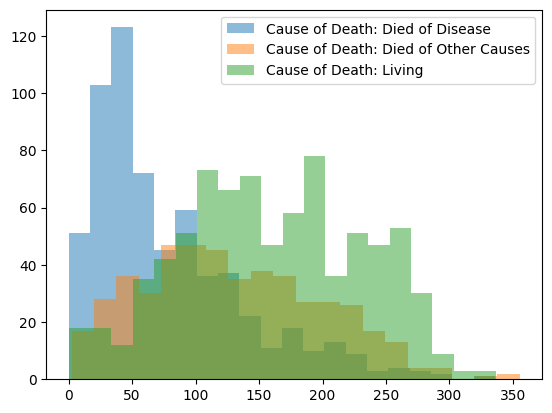

In [ ]:
#survival.groupby(df['death_from_cancer']).hist(bins=20,grid=False)

# Assuming df is your DataFrame and 'death_from_cancer' is the column you want to group by
groups = survival.groupby(df['death_from_cancer'])

# Plotting histograms for each group
for group_name, group_data in groups:
    group_data.hist(bins=20, grid=False, label=f'Cause of Death: {group_name}', alpha=0.5) # alpha=0.5 makes them more transparent

# Adding legend
plt.legend()
plt.show()

# Lasso

In [ ]:
# Split data into training and test sets

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X = mrnaZscores
# y = survival months (the 'target' feature)
X_train, X_test, y_train, y_test = train_test_split(mrnaZscores, survival, test_size=0.2, random_state=42)

In [ ]:
Lasso(mrnaZscores)

Lasso(alpha=       brca1   brca2   palb2    pten    tp53     atm    cdh1   chek2     nbn  \
0    -1.3990 -0.5738 -1.6217  1.4524  0.3504  1.1517  0.0348  0.1266 -0.8361   
1    -1.3800  0.2777 -1.2154  0.5296 -0.0136 -0.2659  1.3594  0.7961  0.5419   
2     0.0670 -0.8426  0.2114 -0.3326  0.5141 -0.0803  1.1398  0.4187 -0.4030   
3     0.6744 -0.5428 -1.6592  0.6369  1.6708 -0.8880  1.2491 -1.1889 -0.4174   
4     1.2932 -0.9039 -0.7219  0.2168  0.3484  0.3897  0.9131  0.9356  0.7675   
...      .....
1902 -1.9467  ... -0.6380 -1.5275  1.1070  0.2194  1.4317 -0.6985 -0.6046   
1903 -0.5629  ...  0.2067 -0.9232 -0.3156  0.8828  0.7520 -1.4187  0.5257   

      ugt2b15  ugt2b17  ugt2b7  
0     -0.5954  -0.8847 -0.3354  
1     -0.2264   0.5398 -0.8920  
2      1.3701  -0.1078  0.3655  
3     -0.3154   0.2320 -0.4828  
4      5.0048   3.8476  1.3223  
...       ...      ...     ...  
1899  -0.2615  -0.6371 -0.5540  
1900  -0.6950   0.0641 -0.8863  
1901  -0.1840   0.0967 -0.6264  
1902  -0.4915  -0.2847 -0.8041  
1903  -0.2316  -0.2081 -0.4328  

[1904 rows x 489 columns])

In [ ]:
y = survival
X = mrnaZscores

# Scale data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

# Run LASSO:
from sklearn import linear_model
from sklearn.linear_model import Lasso

reg = linear_model.Lasso(alpha=2.0,   # increasign aplha from 1
                         warm_start=True,
                         max_iter=2000,
                         fit_intercept=True)

reg.fit(X_sc,y)

sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,brca1,-0.000000
1,brca2,0.000000
2,palb2,0.000000
3,pten,0.000000
4,tp53,0.000000
...,...,...
484,tnk2,0.000000
485,tulp4,-0.000000
486,ugt2b15,0.000000
487,ugt2b17,0.144598


# PCA

In [ ]:
# PCA

# Filter out variables with non-zero coefficients
selected_coeffs = sdf[sdf['slope'] != 0]

# Sort selected coefficients by magnitude
sorted_selected_coeffs = selected_coeffs.reindex(selected_coeffs['slope'].abs().sort_values(ascending=False).index)

print(sorted_selected_coeffs)

     variable     slope
169     gsk3b -7.335477
463    hsd3b7  5.871443
53     stat5b  4.468188
233     pdpk1 -4.343986
109    acvr1b -3.916901
..        ...       ...
453  hsd17b13  0.041181
379      nrg3 -0.031823
275      wwox -0.023691
199     mapk7 -0.020798
103      hes2  0.001465

[86 rows x 2 columns]


In [ ]:
from sklearn.decomposition import PCA

# Extract selected features from the DataFrame
selected_features = sdf.loc[sdf['slope'] != 0, 'variable']  # Extract selected features based on non-zero slopes

# Filter the DataFrame X to keep only the selected features
X_selected = X[selected_features]

# Scale the selected features
scaler_selected = StandardScaler()
X_selected_sc = scaler_selected.fit_transform(X_selected)

# Apply PCA to the selected features
pca = PCA(n_components=2)  # Choose the number of components you want
X_pca = pca.fit_transform(X_selected_sc)

# Now X_pca contains the reduced-dimensional representation of your selected features after applying PCA


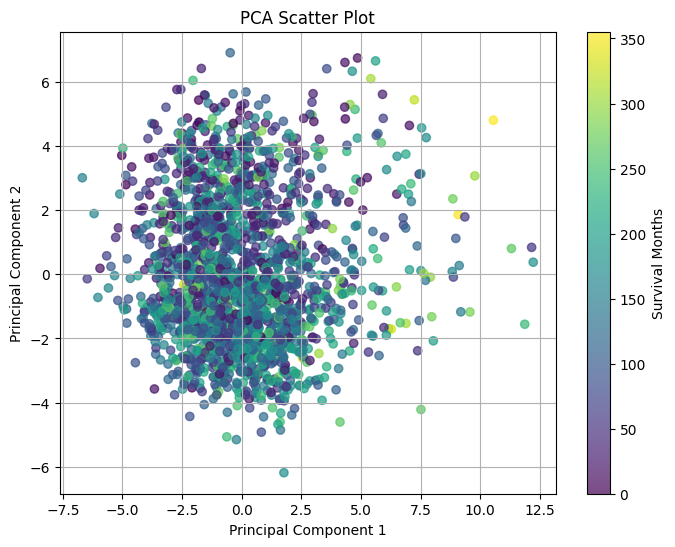

In [ ]:
# Visulaization from PCA

import matplotlib.pyplot as plt

# Scatter plot of the reduced-dimensional representation obtained from PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Survival Months')
plt.grid(True)
plt.show()


# More EDA
## taking into account cause of death

In [ ]:
# drop died of other causes
# separate out living
## make survival probability

In [7]:
import pandas as pd


# Create separate datasets for subjects who are alive and those who died of cancer
alive = df[df['death_from_cancer'] == 'Living'].copy()
cancer_death = df[df['death_from_cancer'] == 'Died of Disease'].copy()


In [5]:
cancer_death.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,622.000000,622.000000,622.000000,622.000000,606.000000,622.000000,622.000000,613.000000,622.000000,622.000000,...,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,4017.591640,60.467508,0.303859,2.663987,2.570957,0.602894,3.427653,5.742251,4.476165,77.225456,...,0.123267,0.008330,0.037292,-0.094163,0.001807,0.049914,0.024938,-0.034958,-0.060925,-0.010009
std,2209.135045,13.592921,0.460292,1.141215,0.572726,0.489692,5.380864,3.487437,1.131330,59.648339,...,1.059147,1.050891,1.065698,1.018379,1.047121,1.042009,1.026044,0.966996,0.882882,0.976355
min,5.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.034000,0.100000,...,-2.120800,-2.616200,-2.719400,-4.982700,-2.704100,-3.717200,-3.609300,-1.027500,-1.798000,-1.051600
25%,2780.000000,50.632500,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.030000,33.916667,...,-0.520250,-0.631300,-0.702075,-0.753075,-0.622825,-0.645850,-0.706500,-0.523525,-0.504550,-0.725975
50%,4758.500000,61.135000,0.000000,3.000000,3.000000,1.000000,1.000000,5.000000,4.099000,56.716667,...,-0.144000,-0.050250,-0.121350,-0.181900,-0.068250,0.090850,-0.003250,-0.312900,-0.172550,-0.427150
75%,5429.750000,70.300000,1.000000,3.000000,3.000000,1.000000,4.000000,7.000000,5.079000,106.341667,...,0.467250,0.561750,0.557125,0.534900,0.592900,0.788075,0.641700,0.029525,0.202500,0.425100
max,7297.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,30.000000,6.360000,335.733333,...,6.534900,10.270300,5.012400,4.292200,12.742300,3.261600,3.173500,8.619900,7.870400,3.260800


In [6]:
alive.describe()


,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,801.000000,801.000000,801.000000,801.000000,779.000000,801.000000,801.000000,771.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,3512.340824,56.463408,0.229713,2.428215,2.350449,0.599251,1.214732,5.322957,3.847730,159.551228,...,-0.002507,0.022716,-0.025053,0.047621,0.031516,-0.182710,-0.094810,0.089140,0.053944,0.024131
std,2548.395825,11.377459,0.420911,1.273834,0.677709,0.490356,2.720539,3.342871,1.065871,71.691593,...,0.980278,1.034936,0.996008,0.911457,0.959939,0.942434,0.983044,1.087993,1.132611,1.009762
min,0.000000,26.720000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-1.747200,-3.364800,-1.935100,-4.298100,-2.981700,-3.833300,-2.646500,-1.166900,-2.112600,-1.009500
25%,509.000000,48.130000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.038000,108.066667,...,-0.615300,-0.614300,-0.672900,-0.494200,-0.569800,-0.763000,-0.793200,-0.491500,-0.444600,-0.717800
50%,3781.000000,56.740000,0.000000,2.000000,2.000000,1.000000,0.000000,5.000000,4.034000,158.033333,...,-0.283500,-0.020800,-0.171800,-0.002400,0.035400,-0.173700,-0.143100,-0.255600,-0.080000,-0.397800
75%,5526.000000,64.430000,0.000000,3.000000,3.000000,1.000000,1.000000,7.000000,5.022000,216.733333,...,0.330500,0.534800,0.443000,0.562000,0.616800,0.422200,0.490300,0.152200,0.294000,0.445300
max,7295.000000,85.210000,1.000000,5.000000,3.000000,1.000000,25.000000,26.000000,6.198000,337.033333,...,5.554400,9.493500,6.329000,4.047600,3.638000,3.049400,3.833400,10.884900,12.643900,3.284400


Therefore,
~ 60% alive,
~ 40 % dead,


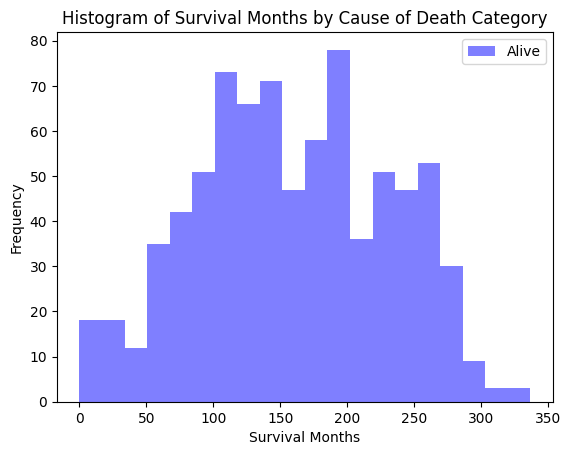

In [11]:
plt.hist(alive['overall_survival_months'], bins=20, color='blue', alpha=0.5, label='Alive')

# Adding legend
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.title('Histogram of Survival Months by Cause of Death Category')
plt.legend()
plt.show()

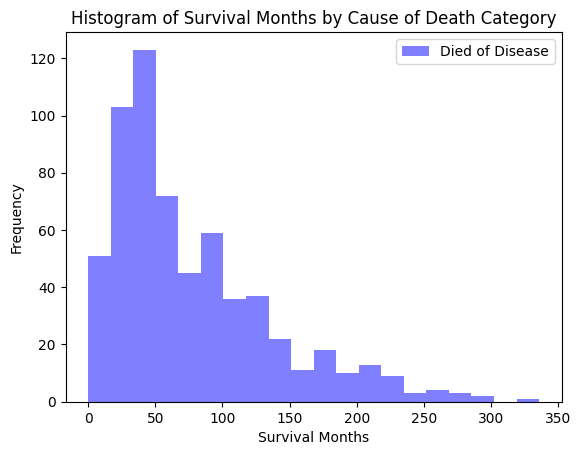

In [10]:
plt.hist(cancer_death['overall_survival_months'], bins=20, color='blue', alpha=0.5, label='Died of Disease')

# Adding legend
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.title('Histogram of Survival Months by Cause of Death Category')
plt.legend()
plt.show()

# Hazard Rate

In [5]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=5a84c11eb433441dfad6db2435a83c01cb3b2e10fb51cf9ec017e4adead6e42a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [15]:
print(survival.describe())


count    1092.000000
mean      126.545452
std        77.134919
min         0.100000
25%        60.825000
50%       116.983333
75%       188.433333
max       337.033333
Name: overall_survival_months, dtype: float64


In [19]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

survival.dropna(inplace=True)
survival = survival.astype('int64')

# Kaplan-Maier Curve Estimation (Non-Parametric)
# with 95% confidence interval
kmf = KaplanMeierFitter()
kmf.fit(durations = survival, event_observed = alive)
kmf.plot_survival_function()

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


TypeError: Wrong dtype 'object'.

AttributeError: 'KaplanMeierFitter' object has no attribute 'cumulative_density_'

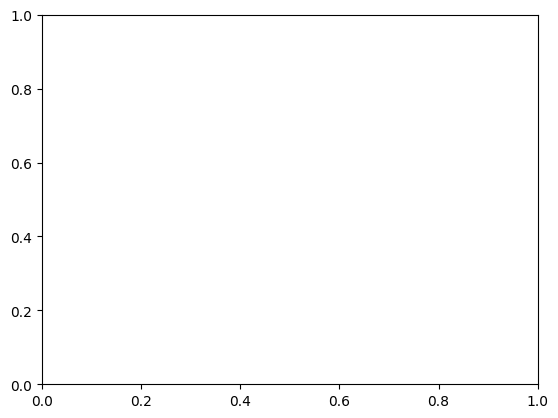

In [13]:
kmf.plot_cumulative_density()
